# E09: Numerical integration of ODEs, and application to the Leaky Integrate-and-Fire neuron model -- Homework
---

Based on the tutorial, we will use simulations of the LIF to check analytical results for the f-I curve that predicts the firing rate of the LIF as a funtion of the input current.

### Let us first plot the analytical solution for the firing rate in the deterministic case ($\sigma=0$)

The time from one spike to the next must be exactly the time it takes to reach the spike threshold when starting from the reset potential: $V(T)=V_{\rm threshold}$. Using the analytical solution for $V(t)$, with $V(t=0)=V_{\rm reset}$,  allows us to calculate the firing rate $f(I)$:

$$f(I) = \frac{1}{\tau_m} \left(\log\frac{E_L+I/g_L-V_{\rm reset}}{E_L+I/g_L-V_{\rm threshold}}\right)^{-1}$$


In [2]:
# some imports for the numerics to follow, you'll be familiar with these
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

/home/mgraupe/.virtualenvs/locorungs/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


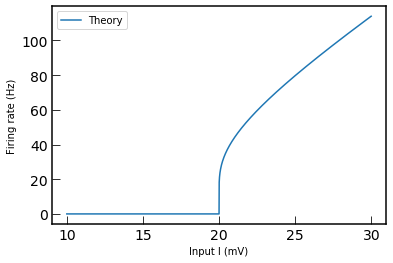

In [3]:
# define parameters
tau = 7.     # decay time constant, in ms
V0 = -70.    # initial voltage, in mV
EL = -50.    # resting potential, in mV
Vthreshold = -30. # mV
Vreset = -55.0    # mV

def fI_theory(I):
    """Firing rate (in Hz) of the LIF as a function 
    of the effective input I/g_L."""
    upper = EL + I -Vreset
    lower = EL + I - Vthreshold
    return 1e3/(tau*np.log(upper/lower))

Ivals = np.arange(10., 30, 0.01)
rates_theory = fI_theory(Ivals)

# set NaN-values (no solution) to 0 below critical current
rates_theory[Ivals<20] = 0

fig, ax = plt.subplots()
ax.plot(Ivals, rates_theory, label='Theory')
ax.set_xlabel('Input I (mV)')
ax.set_ylabel('Firing rate (Hz)')
ax.legend()

#### Homework questions:

1. Simulate the LIF for a duration of 1s, for the value of `I0 = 21.0`. Plot the voltage dynamics for the deterministic case $\sigma=0$. How many spikes do you count? Repeat the same for $\sigma=2$.
2. Repeat the simulation of the LIF for different values of the input, `I0s = np.arange(15.,25.5,0.5)`, for a fixed value of $\sigma=2$, and record the number of spikes and/or the spiketimes. To obtain better statistics, simulate the noisy LIF each time for 5s.
3. From the recorded spiketimes or number of spikes, calculate the firing rate for each of the above values of the input.
4. Plot your results for the firing rate obtained by simulations together with the analytical result for the firing rate in the deterministic case (see above).

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1) see tutorial for example code 

def dvdt(v, I):
    """Derivative of the membrane potential for the 
    LIF. Note that we use I as a short-hand for 
    the input current divided by the leak 
    conductance gL, which has the units of voltage."""
    return (EL+I-v)/tau

tau = 7.    # decay time constant, in ms
V0 = -70.    # initial voltage, in mV
EL = -50.   # resting potential, in mV

I0 = 21. 
Vthreshold = -30. # mV
Vreset = -55.0 # mV
# Can you solve the stochastic ODE numerically?
sigma = 0#0.5

dt = 0.01 # time step in ms
T = 1000.0 # duration in ms
t = np.arange(0,T,dt)
nt = len(t)

# iteration over all times
v = np.zeros(nt)
v[0] = Vreset

nap = 0

# When the neuron spikes, add the spiketime to a list:
spiketimes = []

for i in range(nt-1):
    # Euler integration of subthreshold dynamics: deterministic part
    v[i+1] = v[i] + dt*dvdt(v[i],I0) 

    # Euler integration of subthreshold dynamics: stochastic part
    v[i+1] += np.sqrt(dt*tau)*sigma*np.random.normal()

    # Spike generation?
    if v[i+1] > Vthreshold:
        v[i+1] = Vreset
        nap += 1

        # --> whenever there's a spike at time 'time', do 
        spiketimes.append(dt*(i+1))

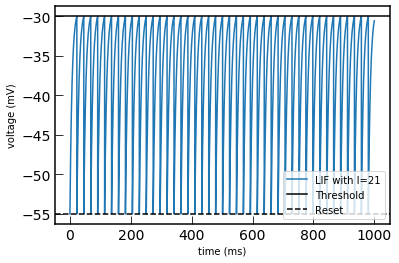

In [5]:
fig, ax = plt.subplots()
ax.plot(t, v, label='LIF with I=%g'%I0)
ax.axhline(Vthreshold,ls='-', c='k', label='Threshold')
ax.axhline(Vreset,ls='--', c='k', label='Reset')
ax.set_xlabel('time (ms)')
ax.set_ylabel('voltage (mV)')
ax.legend()

In [6]:
print('%s spikes are emitted during 1 sec for sigma = 0.'%len(spiketimes))

43 spikes are emitted during 1 sec for sigma = 0.


In [7]:
sigma = 2#0.5

dt = 0.01 # time step in ms
T = 1000.0 # duration in ms
t = np.arange(0,T,dt)
nt = len(t)

# iteration over all times
v = np.zeros(nt)
v[0] = Vreset

nap = 0

# When the neuron spikes, add the spiketime to a list:
spiketimes = []

for i in range(nt-1):
    # Euler integration of subthreshold dynamics: deterministic part
    v[i+1] = v[i] + dt*dvdt(v[i],I0) 

    # Euler integration of subthreshold dynamics: stochastic part
    v[i+1] += np.sqrt(dt*tau)*sigma*np.random.normal()

    # Spike generation?
    if v[i+1] > Vthreshold:
        v[i+1] = Vreset
        nap += 1

        # --> whenever there's a spike at time 'time', do 
        spiketimes.append(dt*(i+1))

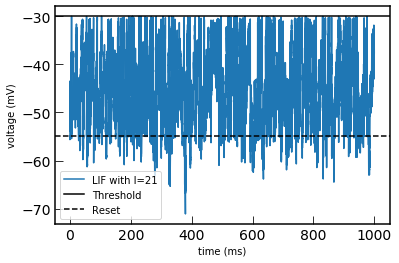

In [8]:
fig, ax = plt.subplots()
ax.plot(t, v, label='LIF with I=%g'%I0)
ax.axhline(Vthreshold,ls='-', c='k', label='Threshold')
ax.axhline(Vreset,ls='--', c='k', label='Reset')
ax.set_xlabel('time (ms)')
ax.set_ylabel('voltage (mV)')
ax.legend()

In [9]:
print('%s spikes are emitted during 1 sec for sigma = 2.'%len(spiketimes))

96 spikes are emitted during 1 sec for sigma = 2.


In [10]:
# 2) try to implement a loop over the different values of I

I0s = np.arange(15.,25.5,0.5)
nI = len(I0s)

sigma = 2.

all_spiketimes = []

# TIP: write an outer loop over currents 
# and do simulation for one 
for I in I0s:
    spiketimes = []
    
    # do computation...
    dt = 0.01 # time step in ms
    T = 5000.0 # duration in ms
    t = np.arange(0,T,dt)
    nt = len(t)

    # iteration over all times
    v = np.zeros(nt)
    v[0] = Vreset

    nap = 0

    # When the neuron spikes, add the spiketime to a list:
    spiketimes = []

    for i in range(nt-1):
        # Euler integration of subthreshold dynamics: deterministic part
        v[i+1] = v[i] + dt*dvdt(v[i],I) 

        # Euler integration of subthreshold dynamics: stochastic part
        v[i+1] += np.sqrt(dt*tau)*sigma*np.random.normal()

        # Spike generation?
        if v[i+1] > Vthreshold:
            v[i+1] = Vreset
            nap += 1

            # --> whenever there's a spike at time 'time', do 
            spiketimes.append(dt*(i+1))
    
    all_spiketimes.append(spiketimes)
    

In [11]:
# 3) a simple proxy of the firing rate (in Hz) is 
#    (number of spikes) / duration (in seconds!)

rates_simulation = []
for i in range(len(all_spiketimes)):
    rates_simulation.append(len(all_spiketimes[i])/5.)

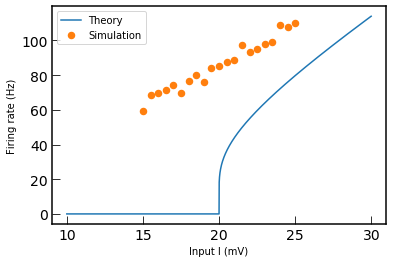

In [12]:
# 4) use above code and add individual points with your rates

# Tip for better 'aesthetics':
# you may want to use circle markers to plot only the points
# that you simulated, i.e., without connecting lines:
#ax.plot(I, rates_simulation, 'o', label='Simulation')

fig, ax = plt.subplots()
ax.plot(Ivals, rates_theory, label='Theory')
ax.plot(I0s, rates_simulation, 'o', label='Simulation')
ax.set_xlabel('Input I (mV)')
ax.set_ylabel('Firing rate (Hz)')
ax.legend()

The simulation is above the theoretical curve due to the fact that there is noise, i.e. sigma>0. The noise makes the neuron fire even for values of the external input below the threshold, i.e. I<20 mV. 